## Description du projet 
Un IDS pour le trafic réseau est un système de sécurité informatique conçu pour surveiller, analyser et détecter des activités anormales ou malveillantes dans le trafic réseau. Il sert à protéger les infrastructures informatiques en identifiant les tentatives d'intrusion ou les comportements non autorisés.
Le système est essentiel pour améliorer la sécurité des plateformes et applications web, détecter les anomalies et les attaques de la cybersécurité, enregister les logs détaillés utilisés lors des audits et enquêtes de sécurité,fournir une couche supplémentaire en complément des antivirus et firewall,etc.

###  Solution proposée 

- Entraîner un modèle de machine learning robuste qui sera capable de comparer le comportement actuel avec le comportement normal attendu afin de détecter l'attaque et mettre en place des pratiques de blockage.

### Etapes de réalisation du projet


### 1.Entrainement d'un modèle intelligent de détection des attaques 

#### 1.1. Choix du dataset 

- Pour l'entraînement des données, on va utiliser un dataset balancé avec deux classes binaires: benigne et maligne, ceci afin de réduire le sur-apprentissage du modèle et assurer une bonne classification du modèle et une bonne précision.
- Pour se faire, on va utiliser le dataset CICIDS-2018 qui contient un jeu de données riches en attaque DDOS.

#### 1.2. Prétraitement des données

- Numérisation des valeurs catégorielles 
- Traitement des valeurs nulles, manquantes, aberrantes 
- Traitement des doublons
- Choix des variables importantes pour l'apprentissage
- Traitement des varaibles numériques infinies 
- Standardisation des données

#### 1.3. Entraînement des modèles de classification binaire

#### 1.4. Test et calcul de la précision,accuracy, recall, roc-curve , f1-score et matrice de confusion

#### 1.5. Choix du meilleur modèle de classification et validation des résultats

### 2.Visualisation des résultats 

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from fastcore.basics import *
from fastcore.parallel import *


In [5]:
#import dataset
df=pd.read_csv("cic-ids_maj_balanced_50_50.csv")

In [6]:
#shape of dataset 
df.shape

(2829000, 40)

In [7]:
#show first rows 
df.head()

,Dst Port,Protocol,Timestamp,TotLen Fwd Pkts,Bwd Pkt Len Min,Flow Byts/s,Fwd IAT Mean,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Std,...,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Max,Idle Min,Label,class_label
0,53,17,15/02/2018 09:12:06,37,53,60524.546066,0.00,0,0,0.0000,...,-1,0,8,0.0,0,0,0,0,0,0
1,45352,6,16/02/2018 01:47:52,935,0,353.184298,1146002.25,22,314384,147343.7626,...,211,1,32,0.0,0,0,0,0,0,0
2,60493,6,14/02/2018 09:20:29,0,0,0.000000,138.00,138,0,0.0000,...,-1,0,20,0.0,0,0,0,0,0,0
3,53,17,01/03/2018 08:45:43,94,101,3674.416873,17424.00,17424,1,0.0000,...,-1,1,8,0.0,0,0,0,0,0,0
4,443,6,15/02/2018 09:58:52,46,0,158075.601375,145.50,140,0,0.0000,...,-1,1,20,0.0,0,0,0,0,0,0


In [8]:
#check NA values 
print(df.isna().sum())

Dst Port             0
Protocol             0
Timestamp            0
TotLen Fwd Pkts      0
Bwd Pkt Len Min      0
Flow Byts/s          0
Fwd IAT Mean         0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd URG Flags        0
Fwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
PSH Flag Cnt         0
ACK Flag Cnt         0
URG Flag Cnt         0
ECE Flag Cnt         0
Down/Up Ratio        0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Subflow Bwd Byts     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Act Data Pkts    0
Fwd Seg Size Min     0
Active Std           0
Active Max           0
Active Min           0
Idle Max             0
Idle Min             0
Label                0
class_label          0
dtype: int64


In [9]:
#check for null values 
print(df.isnull().sum())

Dst Port             0
Protocol             0
Timestamp            0
TotLen Fwd Pkts      0
Bwd Pkt Len Min      0
Flow Byts/s          0
Fwd IAT Mean         0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd URG Flags        0
Fwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
PSH Flag Cnt         0
ACK Flag Cnt         0
URG Flag Cnt         0
ECE Flag Cnt         0
Down/Up Ratio        0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Subflow Bwd Byts     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Act Data Pkts    0
Fwd Seg Size Min     0
Active Std           0
Active Max           0
Active Min           0
Idle Max             0
Idle Min             0
Label                0
class_label          0
dtype: int64


In [10]:
#show statistic description of this dataset
df.describe()

,Dst Port,Protocol,TotLen Fwd Pkts,Bwd Pkt Len Min,Flow Byts/s,Fwd IAT Mean,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Std,Bwd IAT Max,...,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Max,Idle Min,Label,class_label
count,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,...,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2.829000e+06,2829000.0
mean,7.979645e+03,7.540799e+00,3.764591e+02,1.466409e+01,inf,2.133826e+06,1.322354e+06,4.720208e+06,5.978744e+05,1.742904e+06,...,4.495547e+03,1.707515e+00,2.442094e+01,3.317610e+04,1.148396e+05,5.414501e+04,2.994821e+06,2.431342e+06,2.008396e+00,0.5
std,1.685300e+04,3.928631e+00,1.720373e+04,4.034781e+01,NaN,1.050446e+07,5.610870e+08,2.053534e+07,3.064912e+06,8.804505e+06,...,1.572779e+04,1.526111e+01,9.981713e+00,7.462283e+05,1.706139e+06,1.114191e+06,5.826458e+08,1.248054e+07,2.607728e+00,0.5
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.745552e+08,-9.435640e+11,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.300000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,8.000000e+01,6.000000e+00,3.100000e+01,0.000000e+00,1.608891e+01,8.510000e+02,5.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.5
75%,3.389000e+03,6.000000e+00,3.390000e+02,0.000000e+00,6.449740e+03,1.642028e+05,7.590000e+02,4.966300e+04,9.175006e+03,3.881100e+04,...,2.190000e+02,1.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.0
max,6.553500e+04,1.700000e+01,9.789747e+06,1.232000e+03,inf,1.200000e+08,1.200000e+08,1.200000e+08,8.480000e+07,1.200000e+08,...,6.553500e+04,1.829000e+04,5.600000e+01,7.220000e+07,1.140000e+08,1.140000e+08,9.797810e+11,7.758000e+09,8.000000e+00,1.0


In [12]:
#check for binary classes 
print(df['class_label'].value_counts())

0    1414500
1    1414500
Name: class_label, dtype: int64


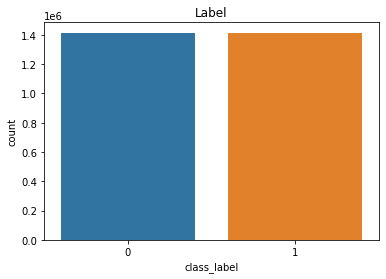

In [13]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='class_label', data=df)
plt.title("Label")
plt.show()

In [14]:
#list of features
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'TotLen Fwd Pkts',
       'Bwd Pkt Len Min', 'Flow Byts/s', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Max', 'Idle Min', 'Label', 'class_label'],
      dtype='object')

In [15]:
# check for NAN and infinite float variables
print('isnan',np.isnan(df.any()))
print('isfinite',np.isfinite(df.all()))

isnan Dst Port             False
Protocol             False
Timestamp            False
TotLen Fwd Pkts      False
Bwd Pkt Len Min      False
Flow Byts/s          False
Fwd IAT Mean         False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
Fwd URG Flags        False
Fwd Header Len       False
Fwd Pkts/s           False
Bwd Pkts/s           False
Pkt Len Min          False
Pkt Len Std          False
Pkt Len Var          False
FIN Flag Cnt         False
PSH Flag Cnt         False
ACK Flag Cnt         False
URG Flag Cnt         False
ECE Flag Cnt         False
Down/Up Ratio        False
Fwd Seg Size Avg     False
Bwd Seg Size Avg     False
Subflow Bwd Byts     False
Init Fwd Win Byts    False
Init Bwd Win Byts    False
Fwd Act Data Pkts    False
Fwd Seg Size Min     False
Active Std           False
Active Max           False
Active Min           False
Idle Max             F

In [16]:
#select features for training
df_n=df[['Dst Port', 'Protocol', 'TotLen Fwd Pkts',
       'Bwd Pkt Len Min', 'Flow Byts/s', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Max', 'Idle Min', 'class_label']]

In [18]:
#deal with infinite float values
df_new = df_n[np.isfinite(df_n).all(1)]

In [19]:
#print variable types
df_new.dtypes

Dst Port               int64
Protocol               int64
TotLen Fwd Pkts        int64
Bwd Pkt Len Min        int64
Flow Byts/s          float64
Fwd IAT Mean         float64
Fwd IAT Min            int64
Bwd IAT Tot            int64
Bwd IAT Std          float64
Bwd IAT Max            int64
Bwd IAT Min            int64
Fwd PSH Flags          int64
Fwd URG Flags          int64
Fwd Header Len         int64
Fwd Pkts/s           float64
Bwd Pkts/s           float64
Pkt Len Min            int64
Pkt Len Std          float64
Pkt Len Var          float64
FIN Flag Cnt           int64
PSH Flag Cnt           int64
ACK Flag Cnt           int64
URG Flag Cnt           int64
ECE Flag Cnt           int64
Down/Up Ratio          int64
Fwd Seg Size Avg     float64
Bwd Seg Size Avg     float64
Subflow Bwd Byts       int64
Init Fwd Win Byts      int64
Init Bwd Win Byts      int64
Fwd Act Data Pkts      int64
Fwd Seg Size Min       int64
Active Std           float64
Active Max             int64
Active Min    

## 1- Split data into Train/test/validate split datasets + normlization

In [20]:
#split dataset to X=features and Y=target
X = df_new[['Dst Port', 'Protocol', 'TotLen Fwd Pkts', 'Bwd Pkt Len Min',
       'Flow Byts/s', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Max', 'Idle Min']] 
y = df_new['class_label']  # Target label
print(X.columns)
print(X.shape)
print(y.shape)

Index(['Dst Port', 'Protocol', 'TotLen Fwd Pkts', 'Bwd Pkt Len Min',
       'Flow Byts/s', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Max', 'Idle Min'],
      dtype='object')
(2825577, 37)
(2825577,)


In [21]:
#Normalize data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Train/test/validate split data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
#shapes
print("X_train",X_train.shape, "\t", "y_train",y_train.shape)
print("X_test",X_test.shape, "\t", "y_test",y_test.shape)
print("X_validate",X_validate.shape, "\t", "y_validate",y_validate.shape)


X_train (1808368, 37) 	 y_train (1808368,)
X_test (565116, 37) 	 y_test (565116,)
X_validate (452093, 37) 	 y_validate (452093,)


## 2- Training models of binary classification 
### 2-1- Random forest

In [23]:
# Random forest with grid search method
from sklearn.model_selection import GridSearchCV 

model = RandomForestClassifier(
    n_estimators=100,#number of tress in the fores 
    criterion='gini',
    max_depth=None,# number of levels in each decision tree 
    min_samples_split=2, #number of the data points in one node before the node is split 
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',# max number of features that should be considered before splitting a node and moving to next level
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True, #method for sampling data 
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [24]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [ ]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
model_rf= clf.best_estimator_

In [24]:
# Initialize the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    281910
           1       0.99      0.96      0.97    283206

    accuracy                           0.97    565116
   macro avg       0.97      0.97      0.97    565116
weighted avg       0.97      0.97      0.97    565116

Confusion Matrix:
[[278070   3840]
 [ 11841 271365]]


In [32]:
#compute accuracy, precision and recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print("Accuracy= {acc:.3f}".format(acc=accuracy))
print("Precision= {prec:.3f}".format(prec=precision))
print("Recall= {rec:.3f}".format(rec=recall))

Accuracy= 0.972
Precision= 0.986
Recall= 0.958


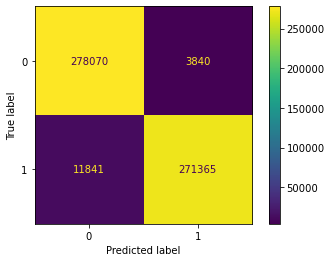

In [28]:
#confusion matrix of random forest model
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format='d')

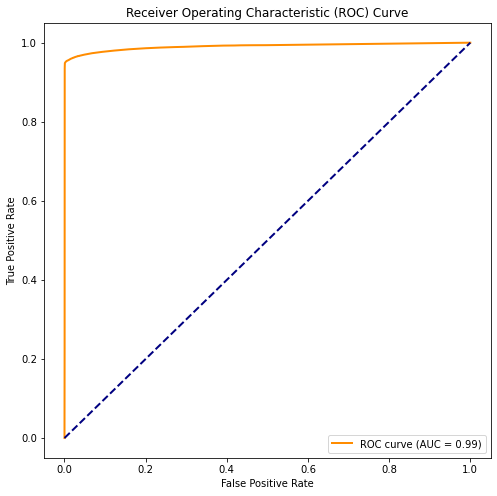

In [33]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2-2- Logistic regression 

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lg = log_reg.predict(X_test)

C:\Users\soukaina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_lg))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93    281910
           1       0.92      0.95      0.94    283206

    accuracy                           0.93    565116
   macro avg       0.93      0.93      0.93    565116
weighted avg       0.93      0.93      0.93    565116



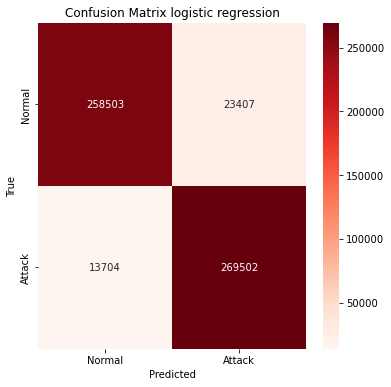

In [37]:
# Compute the confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix logistic regression')
plt.show()

In [40]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)

print("Accuracy: {acc:.3f}".format(acc=accuracy_lg))
print("Precision:{pr:.3f}".format(pr=precision_lg))
print("Recall:{rec:.3f}".format(rec=recall_lg))

Accuracy: 0.934
Precision:0.920
Recall:0.952


### 2-3- Xgboost model

In [56]:
#choose hyperparameter for learning rate 
import xgboost as xgb
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

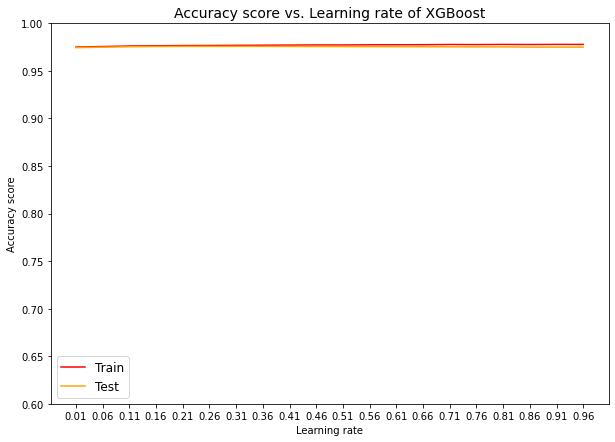

In [57]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='green', label='Train')
plt.plot(learning_rate_range, test_XG, c='orange', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [41]:
import xgboost as xgb
#train data with hyperparameter learning_rate=0.15
xgb_classifier_ = xgb.XGBClassifier(eta = 0.15)
xgb_classifier_.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
y_pred_xgb=xgb_classifier_.predict(X_test)

In [43]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    281910
           1       1.00      0.96      0.98    283206

    accuracy                           0.98    565116
   macro avg       0.98      0.98      0.98    565116
weighted avg       0.98      0.98      0.98    565116



In [44]:
#compute accuracy, precision and recall
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("Accuracy: {acc:.3f}".format(acc=accuracy_xgb))
print("Precision: {pr:.3f}".format(pr=precision_xgb))
print("Recall: {rec:.3f}".format(rec=recall_xgb))

Accuracy: 0.976
Precision: 0.995
Recall: 0.956


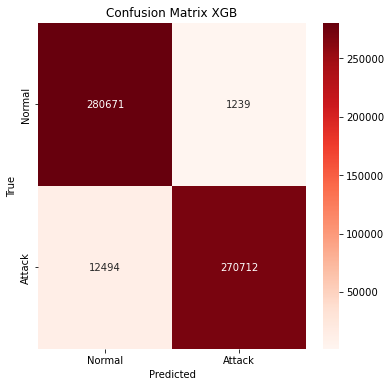

In [45]:
# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix XGB')
plt.show()

### 2-4- SVM model

In [ ]:
#Hyper parameter tuning to choose best values for training SVM model 
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], #error tolerate ratio, small one=high mistake toleration, big value=no mistakes allowed, risk of over-fitting
              'gamma': [1, 0.1, 0.01, 0.001, 10, 100], #decides how closely the model fits the training data, zoom on data in each class, the bigger it is, the more it is zoomed in dataset
              'kernel': ['linear', 'rbf', 'poly'] }#filter that helps drawing boundaries between classes, best is polynomial but depends on dataset 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
#train model on dataset with best etimators
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='scale', C=1, cache_size=7000)
svm_model.fit(X_train,y_train)


In [ ]:
Y_pred_svm=svm_model.predict(X_test)

In [ ]:
print("Train score is:", svm_model.score(X_train, y_train))
print("Test score is:", svm_model.score(X_test,y_test))

In [ ]:
accuracy_svm = accuracy_score(y_test, Y_pred_svm)
precision_svm = precision_score(y_test, Y_pred_svm)
recall_svm = recall_score(y_test, Y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)

In [ ]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, Y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix SVM')
plt.show()

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, Y_pred_svm))

### 2-5- Gradient boosting model

In [46]:
#import gradient boosting classifier model
from sklearn.ensemble import GradientBoostingClassifier as gbx

gb_classifier = gbx(random_state = 0)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
#make predictions
y_pred_gb=gb_classifier.predict(X_test)

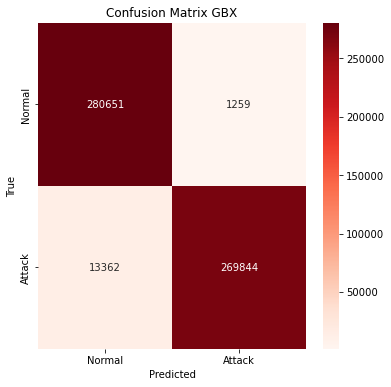

In [49]:
# Compute the confusion matrix
cm_gbx = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_gbx, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix GBX')
plt.show()

In [50]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    281910
           1       1.00      0.95      0.97    283206

    accuracy                           0.97    565116
   macro avg       0.97      0.97      0.97    565116
weighted avg       0.98      0.97      0.97    565116



In [51]:
accuracy_gbx = accuracy_score(y_test, y_pred_gb)
precision_gbx = precision_score(y_test, y_pred_gb)
recall_gbx = recall_score(y_test, y_pred_gb)

print("Accuracy: {acc:.3f}".format(acc=accuracy_gbx))
print("Precision: {pr:.3f}".format(pr=precision_gbx))
print("Recall: {rec:.3f}".format(rec=recall_gbx))

Accuracy: 0.974
Precision: 0.995
Recall: 0.953


###  2-6- ANN

In [34]:
#convert data labeles to tf tensors 
import tensorflow as tf
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [ ]:
# Create the model
dl_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(256, activation="relu"),
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(1, activation="sigmoid")
 ])# Compile the model
dl_model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])# Fit the model
history = dl_model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=0)



In [ ]:
score=dl_model.evaluate(X_test, y_test)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
loss=score[0]
acc_ann=score[1]

In [ ]:
dl_model.summary()

## VOLET2

## <font color='red'> Second investigation comments </font> 

<ul>
    <li>Better dataset of new data of 2018</li>
    <li>More features 39 with correlated data, better learning , no duplicates, no null values</li>
    <li>Classes are balanced, with same number of rows in the classes</li>
    <li>Acc is meaningful, precision and recall are also meaningful </li>
    <li>For the first training of this second round, the best models that predict well on the dataset are Xgboost and random forest </li>
    <li>Accuracy shows how often a classification ML model is correct overall.</li>
<li>Precision shows how often an ML model is correct when predicting the target class.</li>
<li>Recall shows whether an ML model can find all objects of the target class. </li>

</ul>


## <font color='green'> Next steps </font> 

<ul>
    <li>Finetuning of trained models </li>

    

</ul>

## 3-Compare classifiers accuracy and choose best model

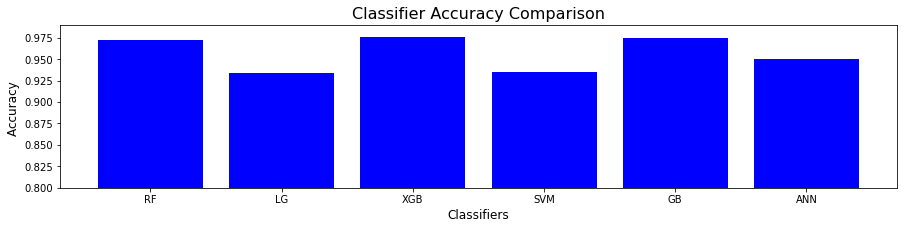

In [54]:
#compare classifiers accuracy
names = ['RF','LG','XGB','SVM','GB', 'ANN']
values = [0.972, 0.934,0.976,0.935,0.974, 0.95]
f = plt.figure(figsize=(15,3),num=5)
# Customize the plot
plt.title('Classifier Accuracy Comparison', fontsize=16)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy ', fontsize=12)
plt.bar(names,values, color='Blue')
plt.ylim(0.80,0.99)  # Set y-axis limits from 80% to 102%

plt.show()

### The best model that predicts well on this dataset is Xgboost 
### In the following we will make predictions on validation set 

In [56]:
import joblib

# Save the choosen model
joblib.dump(xgb_classifier_, 'ids_network_traffic_model.pkl')


['ids_network_traffic_model.pkl']

In [57]:
# Load the model when needed
loaded_model = joblib.load('ids_network_traffic_model.pkl')


In [58]:
print(X_validate.shape)

(452093, 37)


In [59]:
# Make predictions with the loaded modelon validation set
predictions = loaded_model.predict(X_validate)

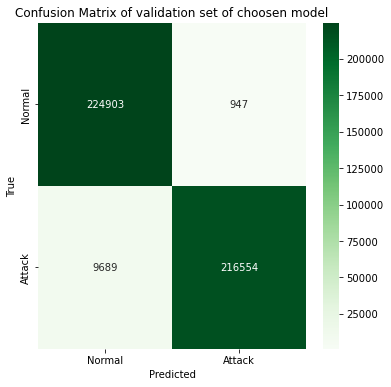

In [60]:
#confusion matrix and acc of final model on validation set 
cm_final_model = confusion_matrix(y_validate, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_final_model, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of validation set of choosen model')
plt.show()

In [61]:
acc_final=accuracy_score(y_validate,predictions)
prec_final=precision_score(y_validate,predictions)
recall_final=recall_score(y_validate,predictions)

In [63]:
print("The final scores of the choosen model on the validation set are:\naccuracy={acc:0.3f} \nprecision={prec:0.3f} \nand recall={recc:0.3f}".format(acc=acc_final, prec=prec_final, recc=recall_final))

The final scores of the choosen model on the validation set are:
accuracy=0.976 
precision=0.996 
and recall=0.957


In [64]:
print("The recap of results is shown below: \n {confusion}".format(confusion=classification_report(y_validate,predictions)))

The recap of results is shown below: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    225850
           1       1.00      0.96      0.98    226243

    accuracy                           0.98    452093
   macro avg       0.98      0.98      0.98    452093
weighted avg       0.98      0.98      0.98    452093

